<table>
    <tr><td><b>Name : Ridhi Sharma</b></td></tr>
    <tr><td><b>Student Number : 21201977</b></td></tr>
    <tr><td><b>Project Name: Non-conventional features for English Word Recognition of non-native speakers</b></td></tr>
    <tr><td><b>Refrence : https://github.com/pberjon/Frequency-centroid-features-for-word-recognition-of-non-native-English-speakers</b></td></tr>
</table>      

# Data Pre-processing and Data Saving

The brief explanation of Data processing has been done is given in readme file and the thesis and code can be found at https://github.com/ridhi-1995/Non-conventional-features-for-English-Word-Recognition-of-non-native-speakers

Below cell import libraries which are required for this data pre-processing task

In [3]:
import os
import cv2
import pandas as pd
import numpy as np
import datetime
import time
import csv 
from pathlib import Path
from numpy import savez_compressed
import IPython.display as ipd
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

For example we can see what is the dimension of the image so that we decide how we have proceed further in data preprocessing

In [5]:
img = cv2.imread(r'D:\OneDrive\Desktop\Project\data\french\noise_modified_samples\clean\fourier+instant\french_training\bags\french10_bags.png')

In [7]:
img.ndim

3

### Below are few functions which we will be using to read and save data in appropiate format

Function sperates data and labels, below is a hierarchy of how the data is saved in local machine, the data can also be found in git-hub repo mentioned above
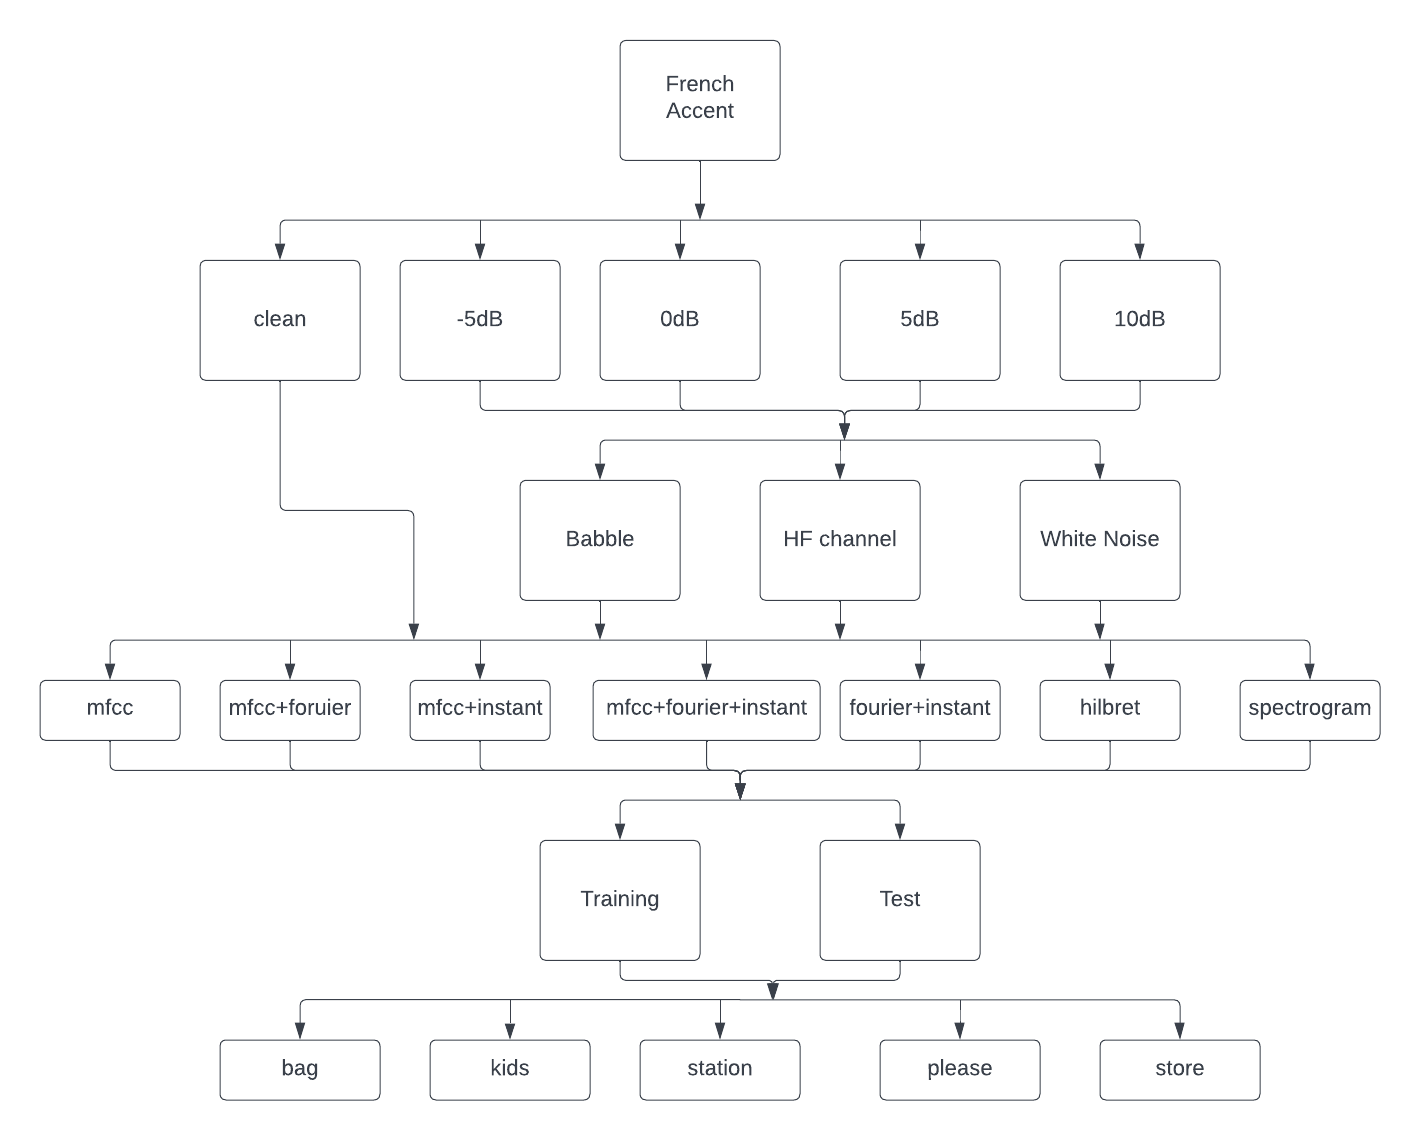

In [2]:
def data_label_creation(word,X,Z,DIR):
    #read image from each directory
    for img in tqdm(os.listdir(DIR)):
        IMG_SIZE=256
        name = img
        label = word #word as label
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR) #reads image
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE)) #resize image to 256*256
        #apped data in X
        X.append(np.array(img))
        #append label in Z
        Z.append([str(label),name])

Now, as we have seen the data is 3d, and X contains of approximately 300 images for a single feature set, hence the whole X variable is 4d of size **(300,256,256,256)**.As a result, the average feature size was computed as **(No.of image,a,b,c)** and the mean for a, b, and c was **(a+b+c)/3**.
After this calculation, the image size was **(300, 65536)**. To normalize the data, we divided the array by the maximum pixel size 255

In [3]:
def covert_feature_array(feature_3D):
    feature_matrix = np.zeros((256,256))
    features=[]
    
    for img in range (0,len(feature_3D)):
        #read each image from the data set
        for i in range(0,len(feature_3D[img])):
            # every image it will calculate mean of elements in 3 dimension
            for j in range(0,len(feature_3D[img][i])):
                feature_matrix[i][j] = (feature_3D[img][i][j].mean())
        feature = np.reshape(feature_matrix, (256*256))
        features= np.append(features, feature)
        
    features = np.reshape(features, (len(feature_3D),(256*256)))
    features= np.array(features)
    #normalize the data
    features= features/255
    
    return features

Label encoders convert non-numerical labels to numeric labels because category labels make it difficult for models to learn from them. Here, "bag" equals "0," "kids" equals "1," "station" equals "2," "please" equals "3," and "shop" equals "4".

In [4]:
def label_encoder_train(Array):
    
    le_train = LabelEncoder()
    L_train= []
    for i in range(len(Array)):
        L_train.append(Array[i][0])
    label_train = le_train.fit_transform(L_train)
    
    return label_train

In [5]:
def label_encoder_test(Array):
    
    le_test = LabelEncoder()
    L_test= []
    for i in range(len(Array)):
        L_test.append(Array[i][0])
    label_test = le_test.fit_transform(L_test)
    
    return label_test

Below function creates data set for training and testing for five words, 'bag', 'store', 'please', 'station' and 'kids'. It also creates data list after calculating the mean and labels for the same. Then it saves the data set in .npz format and labels in .txt format.
Each feature and is passed as an arguement to this function, with its path and file name.

In [6]:
def parse_save_dataset(DIR_train,DIR_test,file_name):
    
    #Note start time
    st = datetime.datetime.now()
    
    #create directories to save the processed data
    file_name_train_data=file_name+"_TrainingData"+".npz"
    file_name_test_data=file_name+"_TestingData"+".npz"
    file_name_train_labels=file_name+"_TrainingLabel"+".txt"
    file_name_test_labels=file_name+"_TestingLabel"+".txt"
    
    path = "Speech_Data/" + file_name
    
    #training list
    X_train=[]
    Z_train=[] 
    
    #path to read data
    dir_data = Path(path)
    dir_data.mkdir(parents=True, exist_ok=True)
    
    file_name_train_data = dir_data/file_name_train_data
    file_name_test_data = dir_data/file_name_test_data
    file_name_train_labels=dir_data/file_name_train_labels
    file_name_test_labels=dir_data/file_name_test_labels

    #path for each word in training set
    BAGS_DIR_train = DIR_train + 'bags'
    KIDS_DIR_train = DIR_train + 'kids'
    STATION_DIR_train = DIR_train + 'station'
    PLEASE_DIR_train = DIR_train + 'please'
    STORE_DIR_train = DIR_train + 'store'

    #testing list
    X_test=[] 
    Z_test=[]

    #path for each word in testing set
    BAGS_DIR_test = DIR_test + 'bags'
    KIDS_DIR_test = DIR_test + 'kids'
    STATION_DIR_test = DIR_test + 'station'
    PLEASE_DIR_test = DIR_test + 'please'
    STORE_DIR_test = DIR_test + 'store'
    
    # Creation of the data corresponding to the 5 words

    data_label_creation('bags',X_train,Z_train,BAGS_DIR_train)
    data_label_creation('kids',X_train,Z_train,KIDS_DIR_train)
    data_label_creation('station',X_train,Z_train,STATION_DIR_train)
    data_label_creation('please',X_train,Z_train,PLEASE_DIR_train)
    data_label_creation('store',X_train,Z_train,STORE_DIR_train)

    data_label_creation('bags',X_test,Z_test,BAGS_DIR_test)
    data_label_creation('kids',X_test,Z_test,KIDS_DIR_test)
    data_label_creation('station',X_test,Z_test,STATION_DIR_test)
    data_label_creation('please',X_test,Z_test,PLEASE_DIR_test)
    data_label_creation('store',X_test,Z_test,STORE_DIR_test)
    
    print("Data Saved")
    
    # save training data
    x_train = covert_feature_array(X_train)
    savez_compressed(file_name_train_data, x_train)
    print("writing to file",file_name_train_data)
    
    # save training label
    y_train = label_encoder_train(Z_train)
    with open(file_name_train_labels, 'w') as fp:
        for label in y_train:
            # write each item on a new line
            fp.write("%d\n" % label)
    print("writing to file",file_name_train_labels)
    
    # save testing data
    x_test = covert_feature_array(X_test)
    savez_compressed(file_name_test_data, x_test)
    print("writing to file",file_name_test_data)    

    # save testing label
    y_test = label_encoder_test(Z_test)
    with open(file_name_test_labels, 'w') as fp:
        for label in y_test:
            # write each item on a new line
            fp.write("%d\n" % label)
    print("writing to file",file_name_test_labels)
   
    #Note start time
    et = datetime.datetime.now()
    
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')

The below code, will pass different features and noises to the above function and save the data set accordingly

In [7]:
list_snr = ['noise_-5dB','noise_0dB','noise_5dB','noise_10dB']
list_noises = ['babble','hf_channel','white_noise']
list_features = ['mfcc','mfcc+fourier','mfcc+instant','mfcc+fourier+instant','fourier+instant','hilbert','spectrograms']

#save and process clean dataset
for feature in list_features:
    DIR_train = os.path.join('F:\\data\\french\\noise_modified_samples\\clean\\', feature,'training\\')
    DIR_test = os.path.join('F:\\data\\french\\noise_modified_samples\\clean\\', feature,'testing_modified\\')
    file_name= "French"+"_"+feature
    parse_save_dataset(DIR_train,DIR_test,file_name)

#save and process noisy dataset    
for snr in list_snr:
        for noise in list_noises:
            for feature in list_features:
                DIR_train = os.path.join('F:\\data\\french\\noise_modified_samples\\', snr, noise, feature,'training\\')
                DIR_test = os.path.join('F:\\data\\french\\noise_modified_samples\\',snr, noise, feature,'testing_modified\\')
                file_name= "French"+"_"+snr+"_"+noise+"_"+feature
                parse_save_dataset(DIR_train,DIR_test,file_name)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 64.23it/s]


Data Saved
writing to file Speech_Data\French_mfcc\French_mfcc_TrainingData.npz
writing to file Speech_Data\French_mfcc\French_mfcc_TrainingLabel.txt
writing to file Speech_Data\French_mfcc\French_mfcc_TestingData.npz
writing to file Speech_Data\French_mfcc\French_mfcc_TestingLabel.txt
Execution time: 0:02:43.957091 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 52.19it/s]


Data Saved
writing to file Speech_Data\French_mfcc+fourier\French_mfcc+fourier_TrainingData.npz
writing to file Speech_Data\French_mfcc+fourier\French_mfcc+fourier_TrainingLabel.txt
writing to file Speech_Data\French_mfcc+fourier\French_mfcc+fourier_TestingData.npz
writing to file Speech_Data\French_mfcc+fourier\French_mfcc+fourier_TestingLabel.txt
Execution time: 0:02:46.015799 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 109.43it/s]


Data Saved
writing to file Speech_Data\French_mfcc+instant\French_mfcc+instant_TrainingData.npz
writing to file Speech_Data\French_mfcc+instant\French_mfcc+instant_TrainingLabel.txt
writing to file Speech_Data\French_mfcc+instant\French_mfcc+instant_TestingData.npz
writing to file Speech_Data\French_mfcc+instant\French_mfcc+instant_TestingLabel.txt
Execution time: 0:02:41.338024 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 82.19it/s]


Data Saved
writing to file Speech_Data\French_mfcc+fourier+instant\French_mfcc+fourier+instant_TrainingData.npz
writing to file Speech_Data\French_mfcc+fourier+instant\French_mfcc+fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_mfcc+fourier+instant\French_mfcc+fourier+instant_TestingData.npz
writing to file Speech_Data\French_mfcc+fourier+instant\French_mfcc+fourier+instant_TestingLabel.txt
Execution time: 0:02:43.363257 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 127.04it/s]


Data Saved
writing to file Speech_Data\French_fourier+instant\French_fourier+instant_TrainingData.npz
writing to file Speech_Data\French_fourier+instant\French_fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_fourier+instant\French_fourier+instant_TestingData.npz
writing to file Speech_Data\French_fourier+instant\French_fourier+instant_TestingLabel.txt
Execution time: 0:02:41.124500 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 90.87it/s]


Data Saved
writing to file Speech_Data\French_hilbert\French_hilbert_TrainingData.npz
writing to file Speech_Data\French_hilbert\French_hilbert_TrainingLabel.txt
writing to file Speech_Data\French_hilbert\French_hilbert_TestingData.npz
writing to file Speech_Data\French_hilbert\French_hilbert_TestingLabel.txt
Execution time: 0:02:39.484666 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 20.88it/s]


Data Saved
writing to file Speech_Data\French_spectrograms\French_spectrograms_TrainingData.npz
writing to file Speech_Data\French_spectrograms\French_spectrograms_TrainingLabel.txt
writing to file Speech_Data\French_spectrograms\French_spectrograms_TestingData.npz
writing to file Speech_Data\French_spectrograms\French_spectrograms_TestingLabel.txt
Execution time: 0:02:53.126247 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 71.38it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_babble_mfcc\French_noise_-5dB_babble_mfcc_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_babble_mfcc\French_noise_-5dB_babble_mfcc_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_babble_mfcc\French_noise_-5dB_babble_mfcc_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_babble_mfcc\French_noise_-5dB_babble_mfcc_TestingLabel.txt
Execution time: 0:02:41.624766 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 47.27it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_babble_mfcc+fourier\French_noise_-5dB_babble_mfcc+fourier_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_babble_mfcc+fourier\French_noise_-5dB_babble_mfcc+fourier_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_babble_mfcc+fourier\French_noise_-5dB_babble_mfcc+fourier_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_babble_mfcc+fourier\French_noise_-5dB_babble_mfcc+fourier_TestingLabel.txt
Execution time: 0:02:45.812011 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 134.73it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_babble_mfcc+instant\French_noise_-5dB_babble_mfcc+instant_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_babble_mfcc+instant\French_noise_-5dB_babble_mfcc+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_babble_mfcc+instant\French_noise_-5dB_babble_mfcc+instant_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_babble_mfcc+instant\French_noise_-5dB_babble_mfcc+instant_TestingLabel.txt
Execution time: 0:02:40.626036 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 49.95it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_babble_mfcc+fourier+instant\French_noise_-5dB_babble_mfcc+fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_babble_mfcc+fourier+instant\French_noise_-5dB_babble_mfcc+fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_babble_mfcc+fourier+instant\French_noise_-5dB_babble_mfcc+fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_babble_mfcc+fourier+instant\French_noise_-5dB_babble_mfcc+fourier+instant_TestingLabel.txt
Execution time: 0:02:43.553931 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 86.71it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_babble_fourier+instant\French_noise_-5dB_babble_fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_babble_fourier+instant\French_noise_-5dB_babble_fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_babble_fourier+instant\French_noise_-5dB_babble_fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_babble_fourier+instant\French_noise_-5dB_babble_fourier+instant_TestingLabel.txt
Execution time: 0:02:40.835139 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 111.72it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_babble_hilbert\French_noise_-5dB_babble_hilbert_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_babble_hilbert\French_noise_-5dB_babble_hilbert_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_babble_hilbert\French_noise_-5dB_babble_hilbert_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_babble_hilbert\French_noise_-5dB_babble_hilbert_TestingLabel.txt
Execution time: 0:02:37.780472 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 21.45it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_babble_spectrograms\French_noise_-5dB_babble_spectrograms_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_babble_spectrograms\French_noise_-5dB_babble_spectrograms_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_babble_spectrograms\French_noise_-5dB_babble_spectrograms_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_babble_spectrograms\French_noise_-5dB_babble_spectrograms_TestingLabel.txt
Execution time: 0:02:52.057941 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 70.23it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc\French_noise_-5dB_hf_channel_mfcc_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc\French_noise_-5dB_hf_channel_mfcc_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc\French_noise_-5dB_hf_channel_mfcc_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc\French_noise_-5dB_hf_channel_mfcc_TestingLabel.txt
Execution time: 0:02:42.365582 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 34.05it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc+fourier\French_noise_-5dB_hf_channel_mfcc+fourier_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc+fourier\French_noise_-5dB_hf_channel_mfcc+fourier_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc+fourier\French_noise_-5dB_hf_channel_mfcc+fourier_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc+fourier\French_noise_-5dB_hf_channel_mfcc+fourier_TestingLabel.txt
Execution time: 0:02:49.096423 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 107.61it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc+instant\French_noise_-5dB_hf_channel_mfcc+instant_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc+instant\French_noise_-5dB_hf_channel_mfcc+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc+instant\French_noise_-5dB_hf_channel_mfcc+instant_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc+instant\French_noise_-5dB_hf_channel_mfcc+instant_TestingLabel.txt
Execution time: 0:02:39.247787 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 62.88it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc+fourier+instant\French_noise_-5dB_hf_channel_mfcc+fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc+fourier+instant\French_noise_-5dB_hf_channel_mfcc+fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc+fourier+instant\French_noise_-5dB_hf_channel_mfcc+fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_hf_channel_mfcc+fourier+instant\French_noise_-5dB_hf_channel_mfcc+fourier+instant_TestingLabel.txt
Execution time: 0:02:45.420651 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 49.64it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_hf_channel_fourier+instant\French_noise_-5dB_hf_channel_fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_hf_channel_fourier+instant\French_noise_-5dB_hf_channel_fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_hf_channel_fourier+instant\French_noise_-5dB_hf_channel_fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_hf_channel_fourier+instant\French_noise_-5dB_hf_channel_fourier+instant_TestingLabel.txt
Execution time: 0:02:44.369758 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 104.47it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_hf_channel_hilbert\French_noise_-5dB_hf_channel_hilbert_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_hf_channel_hilbert\French_noise_-5dB_hf_channel_hilbert_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_hf_channel_hilbert\French_noise_-5dB_hf_channel_hilbert_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_hf_channel_hilbert\French_noise_-5dB_hf_channel_hilbert_TestingLabel.txt
Execution time: 0:02:37.926600 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 17.12it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_hf_channel_spectrograms\French_noise_-5dB_hf_channel_spectrograms_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_hf_channel_spectrograms\French_noise_-5dB_hf_channel_spectrograms_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_hf_channel_spectrograms\French_noise_-5dB_hf_channel_spectrograms_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_hf_channel_spectrograms\French_noise_-5dB_hf_channel_spectrograms_TestingLabel.txt
Execution time: 0:02:56.254731 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 74.53it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc\French_noise_-5dB_white_noise_mfcc_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc\French_noise_-5dB_white_noise_mfcc_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc\French_noise_-5dB_white_noise_mfcc_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc\French_noise_-5dB_white_noise_mfcc_TestingLabel.txt
Execution time: 0:02:40.024960 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 94.36it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc+fourier\French_noise_-5dB_white_noise_mfcc+fourier_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc+fourier\French_noise_-5dB_white_noise_mfcc+fourier_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc+fourier\French_noise_-5dB_white_noise_mfcc+fourier_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc+fourier\French_noise_-5dB_white_noise_mfcc+fourier_TestingLabel.txt
Execution time: 0:02:46.894549 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 135.63it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc+instant\French_noise_-5dB_white_noise_mfcc+instant_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc+instant\French_noise_-5dB_white_noise_mfcc+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc+instant\French_noise_-5dB_white_noise_mfcc+instant_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc+instant\French_noise_-5dB_white_noise_mfcc+instant_TestingLabel.txt
Execution time: 0:02:39.720181 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 27.09it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc+fourier+instant\French_noise_-5dB_white_noise_mfcc+fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc+fourier+instant\French_noise_-5dB_white_noise_mfcc+fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc+fourier+instant\French_noise_-5dB_white_noise_mfcc+fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_white_noise_mfcc+fourier+instant\French_noise_-5dB_white_noise_mfcc+fourier+instant_TestingLabel.txt
Execution time: 0:02:45.362827 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 70.59it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_white_noise_fourier+instant\French_noise_-5dB_white_noise_fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_white_noise_fourier+instant\French_noise_-5dB_white_noise_fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_white_noise_fourier+instant\French_noise_-5dB_white_noise_fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_white_noise_fourier+instant\French_noise_-5dB_white_noise_fourier+instant_TestingLabel.txt
Execution time: 0:02:46.045980 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 86.65it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_white_noise_hilbert\French_noise_-5dB_white_noise_hilbert_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_white_noise_hilbert\French_noise_-5dB_white_noise_hilbert_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_white_noise_hilbert\French_noise_-5dB_white_noise_hilbert_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_white_noise_hilbert\French_noise_-5dB_white_noise_hilbert_TestingLabel.txt
Execution time: 0:02:39.811215 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 23.55it/s]


Data Saved
writing to file Speech_Data\French_noise_-5dB_white_noise_spectrograms\French_noise_-5dB_white_noise_spectrograms_TrainingData.npz
writing to file Speech_Data\French_noise_-5dB_white_noise_spectrograms\French_noise_-5dB_white_noise_spectrograms_TrainingLabel.txt
writing to file Speech_Data\French_noise_-5dB_white_noise_spectrograms\French_noise_-5dB_white_noise_spectrograms_TestingData.npz
writing to file Speech_Data\French_noise_-5dB_white_noise_spectrograms\French_noise_-5dB_white_noise_spectrograms_TestingLabel.txt
Execution time: 0:02:52.909556 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 74.48it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_babble_mfcc\French_noise_0dB_babble_mfcc_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_babble_mfcc\French_noise_0dB_babble_mfcc_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_babble_mfcc\French_noise_0dB_babble_mfcc_TestingData.npz
writing to file Speech_Data\French_noise_0dB_babble_mfcc\French_noise_0dB_babble_mfcc_TestingLabel.txt
Execution time: 0:02:41.706359 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 29.27it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_babble_mfcc+fourier\French_noise_0dB_babble_mfcc+fourier_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_babble_mfcc+fourier\French_noise_0dB_babble_mfcc+fourier_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_babble_mfcc+fourier\French_noise_0dB_babble_mfcc+fourier_TestingData.npz
writing to file Speech_Data\French_noise_0dB_babble_mfcc+fourier\French_noise_0dB_babble_mfcc+fourier_TestingLabel.txt
Execution time: 0:02:47.602964 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 75.59it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_babble_mfcc+instant\French_noise_0dB_babble_mfcc+instant_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_babble_mfcc+instant\French_noise_0dB_babble_mfcc+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_babble_mfcc+instant\French_noise_0dB_babble_mfcc+instant_TestingData.npz
writing to file Speech_Data\French_noise_0dB_babble_mfcc+instant\French_noise_0dB_babble_mfcc+instant_TestingLabel.txt
Execution time: 0:02:39.779317 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 30.05it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_babble_mfcc+fourier+instant\French_noise_0dB_babble_mfcc+fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_babble_mfcc+fourier+instant\French_noise_0dB_babble_mfcc+fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_babble_mfcc+fourier+instant\French_noise_0dB_babble_mfcc+fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_0dB_babble_mfcc+fourier+instant\French_noise_0dB_babble_mfcc+fourier+instant_TestingLabel.txt
Execution time: 0:02:47.819187 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 129.24it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_babble_fourier+instant\French_noise_0dB_babble_fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_babble_fourier+instant\French_noise_0dB_babble_fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_babble_fourier+instant\French_noise_0dB_babble_fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_0dB_babble_fourier+instant\French_noise_0dB_babble_fourier+instant_TestingLabel.txt
Execution time: 0:02:42.587621 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 63.36it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_babble_hilbert\French_noise_0dB_babble_hilbert_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_babble_hilbert\French_noise_0dB_babble_hilbert_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_babble_hilbert\French_noise_0dB_babble_hilbert_TestingData.npz
writing to file Speech_Data\French_noise_0dB_babble_hilbert\French_noise_0dB_babble_hilbert_TestingLabel.txt
Execution time: 0:01:44.921863 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.20it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_babble_spectrograms\French_noise_0dB_babble_spectrograms_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_babble_spectrograms\French_noise_0dB_babble_spectrograms_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_babble_spectrograms\French_noise_0dB_babble_spectrograms_TestingData.npz
writing to file Speech_Data\French_noise_0dB_babble_spectrograms\French_noise_0dB_babble_spectrograms_TestingLabel.txt
Execution time: 0:01:53.340484 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 57.72it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc\French_noise_0dB_hf_channel_mfcc_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc\French_noise_0dB_hf_channel_mfcc_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc\French_noise_0dB_hf_channel_mfcc_TestingData.npz
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc\French_noise_0dB_hf_channel_mfcc_TestingLabel.txt
Execution time: 0:02:56.259231 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 32.01it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc+fourier\French_noise_0dB_hf_channel_mfcc+fourier_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc+fourier\French_noise_0dB_hf_channel_mfcc+fourier_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc+fourier\French_noise_0dB_hf_channel_mfcc+fourier_TestingData.npz
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc+fourier\French_noise_0dB_hf_channel_mfcc+fourier_TestingLabel.txt
Execution time: 0:02:51.926847 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 145.68it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc+instant\French_noise_0dB_hf_channel_mfcc+instant_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc+instant\French_noise_0dB_hf_channel_mfcc+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc+instant\French_noise_0dB_hf_channel_mfcc+instant_TestingData.npz
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc+instant\French_noise_0dB_hf_channel_mfcc+instant_TestingLabel.txt
Execution time: 0:03:09.317450 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 64.83it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc+fourier+instant\French_noise_0dB_hf_channel_mfcc+fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc+fourier+instant\French_noise_0dB_hf_channel_mfcc+fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc+fourier+instant\French_noise_0dB_hf_channel_mfcc+fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_0dB_hf_channel_mfcc+fourier+instant\French_noise_0dB_hf_channel_mfcc+fourier+instant_TestingLabel.txt
Execution time: 0:03:10.271368 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 134.70it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_hf_channel_fourier+instant\French_noise_0dB_hf_channel_fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_hf_channel_fourier+instant\French_noise_0dB_hf_channel_fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_hf_channel_fourier+instant\French_noise_0dB_hf_channel_fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_0dB_hf_channel_fourier+instant\French_noise_0dB_hf_channel_fourier+instant_TestingLabel.txt
Execution time: 0:03:29.509835 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 57.30it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_hf_channel_hilbert\French_noise_0dB_hf_channel_hilbert_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_hf_channel_hilbert\French_noise_0dB_hf_channel_hilbert_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_hf_channel_hilbert\French_noise_0dB_hf_channel_hilbert_TestingData.npz
writing to file Speech_Data\French_noise_0dB_hf_channel_hilbert\French_noise_0dB_hf_channel_hilbert_TestingLabel.txt
Execution time: 0:02:20.474602 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 21.35it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_hf_channel_spectrograms\French_noise_0dB_hf_channel_spectrograms_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_hf_channel_spectrograms\French_noise_0dB_hf_channel_spectrograms_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_hf_channel_spectrograms\French_noise_0dB_hf_channel_spectrograms_TestingData.npz
writing to file Speech_Data\French_noise_0dB_hf_channel_spectrograms\French_noise_0dB_hf_channel_spectrograms_TestingLabel.txt
Execution time: 0:02:31.204748 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 38.71it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc\French_noise_0dB_white_noise_mfcc_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc\French_noise_0dB_white_noise_mfcc_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc\French_noise_0dB_white_noise_mfcc_TestingData.npz
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc\French_noise_0dB_white_noise_mfcc_TestingLabel.txt
Execution time: 0:03:30.447576 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 34.75it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc+fourier\French_noise_0dB_white_noise_mfcc+fourier_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc+fourier\French_noise_0dB_white_noise_mfcc+fourier_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc+fourier\French_noise_0dB_white_noise_mfcc+fourier_TestingData.npz
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc+fourier\French_noise_0dB_white_noise_mfcc+fourier_TestingLabel.txt
Execution time: 0:03:31.167409 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 133.46it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc+instant\French_noise_0dB_white_noise_mfcc+instant_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc+instant\French_noise_0dB_white_noise_mfcc+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc+instant\French_noise_0dB_white_noise_mfcc+instant_TestingData.npz
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc+instant\French_noise_0dB_white_noise_mfcc+instant_TestingLabel.txt
Execution time: 0:03:27.343770 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 36.52it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc+fourier+instant\French_noise_0dB_white_noise_mfcc+fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc+fourier+instant\French_noise_0dB_white_noise_mfcc+fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc+fourier+instant\French_noise_0dB_white_noise_mfcc+fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_0dB_white_noise_mfcc+fourier+instant\French_noise_0dB_white_noise_mfcc+fourier+instant_TestingLabel.txt
Execution time: 0:03:34.648918 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 41.09it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_white_noise_fourier+instant\French_noise_0dB_white_noise_fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_white_noise_fourier+instant\French_noise_0dB_white_noise_fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_white_noise_fourier+instant\French_noise_0dB_white_noise_fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_0dB_white_noise_fourier+instant\French_noise_0dB_white_noise_fourier+instant_TestingLabel.txt
Execution time: 0:03:29.263818 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 51.17it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_white_noise_hilbert\French_noise_0dB_white_noise_hilbert_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_white_noise_hilbert\French_noise_0dB_white_noise_hilbert_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_white_noise_hilbert\French_noise_0dB_white_noise_hilbert_TestingData.npz
writing to file Speech_Data\French_noise_0dB_white_noise_hilbert\French_noise_0dB_white_noise_hilbert_TestingLabel.txt
Execution time: 0:01:56.443817 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.84it/s]


Data Saved
writing to file Speech_Data\French_noise_0dB_white_noise_spectrograms\French_noise_0dB_white_noise_spectrograms_TrainingData.npz
writing to file Speech_Data\French_noise_0dB_white_noise_spectrograms\French_noise_0dB_white_noise_spectrograms_TrainingLabel.txt
writing to file Speech_Data\French_noise_0dB_white_noise_spectrograms\French_noise_0dB_white_noise_spectrograms_TestingData.npz
writing to file Speech_Data\French_noise_0dB_white_noise_spectrograms\French_noise_0dB_white_noise_spectrograms_TestingLabel.txt
Execution time: 0:02:00.777444 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 59.06it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_babble_mfcc\French_noise_5dB_babble_mfcc_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_babble_mfcc\French_noise_5dB_babble_mfcc_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_babble_mfcc\French_noise_5dB_babble_mfcc_TestingData.npz
writing to file Speech_Data\French_noise_5dB_babble_mfcc\French_noise_5dB_babble_mfcc_TestingLabel.txt
Execution time: 0:02:50.783201 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 50.04it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_babble_mfcc+fourier\French_noise_5dB_babble_mfcc+fourier_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_babble_mfcc+fourier\French_noise_5dB_babble_mfcc+fourier_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_babble_mfcc+fourier\French_noise_5dB_babble_mfcc+fourier_TestingData.npz
writing to file Speech_Data\French_noise_5dB_babble_mfcc+fourier\French_noise_5dB_babble_mfcc+fourier_TestingLabel.txt
Execution time: 0:03:00.339126 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 75.42it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_babble_mfcc+instant\French_noise_5dB_babble_mfcc+instant_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_babble_mfcc+instant\French_noise_5dB_babble_mfcc+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_babble_mfcc+instant\French_noise_5dB_babble_mfcc+instant_TestingData.npz
writing to file Speech_Data\French_noise_5dB_babble_mfcc+instant\French_noise_5dB_babble_mfcc+instant_TestingLabel.txt
Execution time: 0:02:49.167955 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 40.97it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_babble_mfcc+fourier+instant\French_noise_5dB_babble_mfcc+fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_babble_mfcc+fourier+instant\French_noise_5dB_babble_mfcc+fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_babble_mfcc+fourier+instant\French_noise_5dB_babble_mfcc+fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_5dB_babble_mfcc+fourier+instant\French_noise_5dB_babble_mfcc+fourier+instant_TestingLabel.txt
Execution time: 0:02:56.517879 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 81.25it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_babble_fourier+instant\French_noise_5dB_babble_fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_babble_fourier+instant\French_noise_5dB_babble_fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_babble_fourier+instant\French_noise_5dB_babble_fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_5dB_babble_fourier+instant\French_noise_5dB_babble_fourier+instant_TestingLabel.txt
Execution time: 0:02:50.505061 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 50.31it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_babble_hilbert\French_noise_5dB_babble_hilbert_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_babble_hilbert\French_noise_5dB_babble_hilbert_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_babble_hilbert\French_noise_5dB_babble_hilbert_TestingData.npz
writing to file Speech_Data\French_noise_5dB_babble_hilbert\French_noise_5dB_babble_hilbert_TestingLabel.txt
Execution time: 0:01:51.752302 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 24.64it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_babble_spectrograms\French_noise_5dB_babble_spectrograms_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_babble_spectrograms\French_noise_5dB_babble_spectrograms_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_babble_spectrograms\French_noise_5dB_babble_spectrograms_TestingData.npz
writing to file Speech_Data\French_noise_5dB_babble_spectrograms\French_noise_5dB_babble_spectrograms_TestingLabel.txt
Execution time: 0:02:01.046939 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 43.10it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc\French_noise_5dB_hf_channel_mfcc_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc\French_noise_5dB_hf_channel_mfcc_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc\French_noise_5dB_hf_channel_mfcc_TestingData.npz
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc\French_noise_5dB_hf_channel_mfcc_TestingLabel.txt
Execution time: 0:02:42.504478 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 32.89it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc+fourier\French_noise_5dB_hf_channel_mfcc+fourier_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc+fourier\French_noise_5dB_hf_channel_mfcc+fourier_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc+fourier\French_noise_5dB_hf_channel_mfcc+fourier_TestingData.npz
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc+fourier\French_noise_5dB_hf_channel_mfcc+fourier_TestingLabel.txt
Execution time: 0:03:05.294346 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 110.00it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc+instant\French_noise_5dB_hf_channel_mfcc+instant_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc+instant\French_noise_5dB_hf_channel_mfcc+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc+instant\French_noise_5dB_hf_channel_mfcc+instant_TestingData.npz
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc+instant\French_noise_5dB_hf_channel_mfcc+instant_TestingLabel.txt
Execution time: 0:03:07.498667 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 40.57it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc+fourier+instant\French_noise_5dB_hf_channel_mfcc+fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc+fourier+instant\French_noise_5dB_hf_channel_mfcc+fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc+fourier+instant\French_noise_5dB_hf_channel_mfcc+fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_5dB_hf_channel_mfcc+fourier+instant\French_noise_5dB_hf_channel_mfcc+fourier+instant_TestingLabel.txt
Execution time: 0:03:26.454465 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 63.95it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_hf_channel_fourier+instant\French_noise_5dB_hf_channel_fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_hf_channel_fourier+instant\French_noise_5dB_hf_channel_fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_hf_channel_fourier+instant\French_noise_5dB_hf_channel_fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_5dB_hf_channel_fourier+instant\French_noise_5dB_hf_channel_fourier+instant_TestingLabel.txt
Execution time: 0:03:09.113768 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 98.48it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_hf_channel_hilbert\French_noise_5dB_hf_channel_hilbert_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_hf_channel_hilbert\French_noise_5dB_hf_channel_hilbert_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_hf_channel_hilbert\French_noise_5dB_hf_channel_hilbert_TestingData.npz
writing to file Speech_Data\French_noise_5dB_hf_channel_hilbert\French_noise_5dB_hf_channel_hilbert_TestingLabel.txt
Execution time: 0:01:46.651800 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 25.56it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_hf_channel_spectrograms\French_noise_5dB_hf_channel_spectrograms_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_hf_channel_spectrograms\French_noise_5dB_hf_channel_spectrograms_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_hf_channel_spectrograms\French_noise_5dB_hf_channel_spectrograms_TestingData.npz
writing to file Speech_Data\French_noise_5dB_hf_channel_spectrograms\French_noise_5dB_hf_channel_spectrograms_TestingLabel.txt
Execution time: 0:01:53.140625 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 63.46it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc\French_noise_5dB_white_noise_mfcc_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc\French_noise_5dB_white_noise_mfcc_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc\French_noise_5dB_white_noise_mfcc_TestingData.npz
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc\French_noise_5dB_white_noise_mfcc_TestingLabel.txt
Execution time: 0:02:40.924087 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 51.80it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc+fourier\French_noise_5dB_white_noise_mfcc+fourier_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc+fourier\French_noise_5dB_white_noise_mfcc+fourier_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc+fourier\French_noise_5dB_white_noise_mfcc+fourier_TestingData.npz
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc+fourier\French_noise_5dB_white_noise_mfcc+fourier_TestingLabel.txt
Execution time: 0:02:45.889423 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 87.88it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc+instant\French_noise_5dB_white_noise_mfcc+instant_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc+instant\French_noise_5dB_white_noise_mfcc+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc+instant\French_noise_5dB_white_noise_mfcc+instant_TestingData.npz
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc+instant\French_noise_5dB_white_noise_mfcc+instant_TestingLabel.txt
Execution time: 0:02:43.212184 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 59.17it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc+fourier+instant\French_noise_5dB_white_noise_mfcc+fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc+fourier+instant\French_noise_5dB_white_noise_mfcc+fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc+fourier+instant\French_noise_5dB_white_noise_mfcc+fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_5dB_white_noise_mfcc+fourier+instant\French_noise_5dB_white_noise_mfcc+fourier+instant_TestingLabel.txt
Execution time: 0:02:47.015460 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 99.56it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_white_noise_fourier+instant\French_noise_5dB_white_noise_fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_white_noise_fourier+instant\French_noise_5dB_white_noise_fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_white_noise_fourier+instant\French_noise_5dB_white_noise_fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_5dB_white_noise_fourier+instant\French_noise_5dB_white_noise_fourier+instant_TestingLabel.txt
Execution time: 0:02:41.292459 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 83.64it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_white_noise_hilbert\French_noise_5dB_white_noise_hilbert_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_white_noise_hilbert\French_noise_5dB_white_noise_hilbert_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_white_noise_hilbert\French_noise_5dB_white_noise_hilbert_TestingData.npz
writing to file Speech_Data\French_noise_5dB_white_noise_hilbert\French_noise_5dB_white_noise_hilbert_TestingLabel.txt
Execution time: 0:01:44.233492 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 21.59it/s]


Data Saved
writing to file Speech_Data\French_noise_5dB_white_noise_spectrograms\French_noise_5dB_white_noise_spectrograms_TrainingData.npz
writing to file Speech_Data\French_noise_5dB_white_noise_spectrograms\French_noise_5dB_white_noise_spectrograms_TrainingLabel.txt
writing to file Speech_Data\French_noise_5dB_white_noise_spectrograms\French_noise_5dB_white_noise_spectrograms_TestingData.npz
writing to file Speech_Data\French_noise_5dB_white_noise_spectrograms\French_noise_5dB_white_noise_spectrograms_TestingLabel.txt
Execution time: 0:01:52.572981 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 57.45it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_babble_mfcc\French_noise_10dB_babble_mfcc_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_babble_mfcc\French_noise_10dB_babble_mfcc_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_babble_mfcc\French_noise_10dB_babble_mfcc_TestingData.npz
writing to file Speech_Data\French_noise_10dB_babble_mfcc\French_noise_10dB_babble_mfcc_TestingLabel.txt
Execution time: 0:02:41.618281 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 78.06it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_babble_mfcc+fourier\French_noise_10dB_babble_mfcc+fourier_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_babble_mfcc+fourier\French_noise_10dB_babble_mfcc+fourier_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_babble_mfcc+fourier\French_noise_10dB_babble_mfcc+fourier_TestingData.npz
writing to file Speech_Data\French_noise_10dB_babble_mfcc+fourier\French_noise_10dB_babble_mfcc+fourier_TestingLabel.txt
Execution time: 0:02:50.842187 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 112.20it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_babble_mfcc+instant\French_noise_10dB_babble_mfcc+instant_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_babble_mfcc+instant\French_noise_10dB_babble_mfcc+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_babble_mfcc+instant\French_noise_10dB_babble_mfcc+instant_TestingData.npz
writing to file Speech_Data\French_noise_10dB_babble_mfcc+instant\French_noise_10dB_babble_mfcc+instant_TestingLabel.txt
Execution time: 0:02:41.204547 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 24.78it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_babble_mfcc+fourier+instant\French_noise_10dB_babble_mfcc+fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_babble_mfcc+fourier+instant\French_noise_10dB_babble_mfcc+fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_babble_mfcc+fourier+instant\French_noise_10dB_babble_mfcc+fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_10dB_babble_mfcc+fourier+instant\French_noise_10dB_babble_mfcc+fourier+instant_TestingLabel.txt
Execution time: 0:02:49.438088 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 78.92it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_babble_fourier+instant\French_noise_10dB_babble_fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_babble_fourier+instant\French_noise_10dB_babble_fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_babble_fourier+instant\French_noise_10dB_babble_fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_10dB_babble_fourier+instant\French_noise_10dB_babble_fourier+instant_TestingLabel.txt
Execution time: 0:02:42.172910 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 89.91it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_babble_hilbert\French_noise_10dB_babble_hilbert_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_babble_hilbert\French_noise_10dB_babble_hilbert_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_babble_hilbert\French_noise_10dB_babble_hilbert_TestingData.npz
writing to file Speech_Data\French_noise_10dB_babble_hilbert\French_noise_10dB_babble_hilbert_TestingLabel.txt
Execution time: 0:01:45.212865 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 29.96it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_babble_spectrograms\French_noise_10dB_babble_spectrograms_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_babble_spectrograms\French_noise_10dB_babble_spectrograms_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_babble_spectrograms\French_noise_10dB_babble_spectrograms_TestingData.npz
writing to file Speech_Data\French_noise_10dB_babble_spectrograms\French_noise_10dB_babble_spectrograms_TestingLabel.txt
Execution time: 0:01:52.900659 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 66.45it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc\French_noise_10dB_hf_channel_mfcc_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc\French_noise_10dB_hf_channel_mfcc_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc\French_noise_10dB_hf_channel_mfcc_TestingData.npz
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc\French_noise_10dB_hf_channel_mfcc_TestingLabel.txt
Execution time: 0:02:41.250133 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 38.26it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc+fourier\French_noise_10dB_hf_channel_mfcc+fourier_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc+fourier\French_noise_10dB_hf_channel_mfcc+fourier_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc+fourier\French_noise_10dB_hf_channel_mfcc+fourier_TestingData.npz
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc+fourier\French_noise_10dB_hf_channel_mfcc+fourier_TestingLabel.txt
Execution time: 0:03:04.441257 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 110.50it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc+instant\French_noise_10dB_hf_channel_mfcc+instant_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc+instant\French_noise_10dB_hf_channel_mfcc+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc+instant\French_noise_10dB_hf_channel_mfcc+instant_TestingData.npz
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc+instant\French_noise_10dB_hf_channel_mfcc+instant_TestingLabel.txt
Execution time: 0:03:12.126856 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 83.23it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc+fourier+instant\French_noise_10dB_hf_channel_mfcc+fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc+fourier+instant\French_noise_10dB_hf_channel_mfcc+fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc+fourier+instant\French_noise_10dB_hf_channel_mfcc+fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_10dB_hf_channel_mfcc+fourier+instant\French_noise_10dB_hf_channel_mfcc+fourier+instant_TestingLabel.txt
Execution time: 0:02:58.477191 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 42.68it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_hf_channel_fourier+instant\French_noise_10dB_hf_channel_fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_hf_channel_fourier+instant\French_noise_10dB_hf_channel_fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_hf_channel_fourier+instant\French_noise_10dB_hf_channel_fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_10dB_hf_channel_fourier+instant\French_noise_10dB_hf_channel_fourier+instant_TestingLabel.txt
Execution time: 0:03:03.025914 seconds


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 100.69it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_hf_channel_hilbert\French_noise_10dB_hf_channel_hilbert_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_hf_channel_hilbert\French_noise_10dB_hf_channel_hilbert_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_hf_channel_hilbert\French_noise_10dB_hf_channel_hilbert_TestingData.npz
writing to file Speech_Data\French_noise_10dB_hf_channel_hilbert\French_noise_10dB_hf_channel_hilbert_TestingLabel.txt
Execution time: 0:01:55.041281 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 14.52it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_hf_channel_spectrograms\French_noise_10dB_hf_channel_spectrograms_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_hf_channel_spectrograms\French_noise_10dB_hf_channel_spectrograms_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_hf_channel_spectrograms\French_noise_10dB_hf_channel_spectrograms_TestingData.npz
writing to file Speech_Data\French_noise_10dB_hf_channel_spectrograms\French_noise_10dB_hf_channel_spectrograms_TestingLabel.txt
Execution time: 0:02:08.346214 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 49.89it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc\French_noise_10dB_white_noise_mfcc_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc\French_noise_10dB_white_noise_mfcc_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc\French_noise_10dB_white_noise_mfcc_TestingData.npz
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc\French_noise_10dB_white_noise_mfcc_TestingLabel.txt
Execution time: 0:03:06.901004 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 49.47it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc+fourier\French_noise_10dB_white_noise_mfcc+fourier_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc+fourier\French_noise_10dB_white_noise_mfcc+fourier_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc+fourier\French_noise_10dB_white_noise_mfcc+fourier_TestingData.npz
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc+fourier\French_noise_10dB_white_noise_mfcc+fourier_TestingLabel.txt
Execution time: 0:03:09.896030 seconds


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 129.53it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc+instant\French_noise_10dB_white_noise_mfcc+instant_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc+instant\French_noise_10dB_white_noise_mfcc+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc+instant\French_noise_10dB_white_noise_mfcc+instant_TestingData.npz
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc+instant\French_noise_10dB_white_noise_mfcc+instant_TestingLabel.txt
Execution time: 0:03:20.431610 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 92.44it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc+fourier+instant\French_noise_10dB_white_noise_mfcc+fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc+fourier+instant\French_noise_10dB_white_noise_mfcc+fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc+fourier+instant\French_noise_10dB_white_noise_mfcc+fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_10dB_white_noise_mfcc+fourier+instant\French_noise_10dB_white_noise_mfcc+fourier+instant_TestingLabel.txt
Execution time: 0:04:18.136118 seconds


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 49.71it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_white_noise_fourier+instant\French_noise_10dB_white_noise_fourier+instant_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_white_noise_fourier+instant\French_noise_10dB_white_noise_fourier+instant_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_white_noise_fourier+instant\French_noise_10dB_white_noise_fourier+instant_TestingData.npz
writing to file Speech_Data\French_noise_10dB_white_noise_fourier+instant\French_noise_10dB_white_noise_fourier+instant_TestingLabel.txt
Execution time: 0:03:10.262856 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 74.27it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_white_noise_hilbert\French_noise_10dB_white_noise_hilbert_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_white_noise_hilbert\French_noise_10dB_white_noise_hilbert_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_white_noise_hilbert\French_noise_10dB_white_noise_hilbert_TestingData.npz
writing to file Speech_Data\French_noise_10dB_white_noise_hilbert\French_noise_10dB_white_noise_hilbert_TestingLabel.txt
Execution time: 0:02:21.408853 seconds


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.47it/s]


Data Saved
writing to file Speech_Data\French_noise_10dB_white_noise_spectrograms\French_noise_10dB_white_noise_spectrograms_TrainingData.npz
writing to file Speech_Data\French_noise_10dB_white_noise_spectrograms\French_noise_10dB_white_noise_spectrograms_TrainingLabel.txt
writing to file Speech_Data\French_noise_10dB_white_noise_spectrograms\French_noise_10dB_white_noise_spectrograms_TestingData.npz
writing to file Speech_Data\French_noise_10dB_white_noise_spectrograms\French_noise_10dB_white_noise_spectrograms_TestingLabel.txt
Execution time: 0:02:15.384262 seconds
